In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
from PIL import Image

In [46]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.cn1 = nn.Conv2d(1, 16, 3, 1)
        self.cn2 = nn.Conv2d(16, 32, 3, 1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608, 64) # 4608 is basically 12 X 12 X 32
        self.fc2 = nn.Linear(64, 10)
 
    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dp1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x, dim=1)
        return op
    
model = ConvNet()

In [3]:
PATH_TO_MODEL = "./convnet.pth"
model.load_state_dict(torch.load(PATH_TO_MODEL, map_location="cpu"))

<All keys matched successfully>

In [47]:
model.eval()

ConvNet(
  (cn1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (cn2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (dp1): Dropout2d(p=0.1, inplace=False)
  (dp2): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=4608, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [36]:
image = Image.open("digit_image.jpg").convert('RGB')

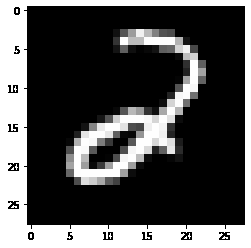

In [37]:
image

In [38]:
def image_to_tensor(image):
    gray_image = transforms.functional.to_grayscale(image)
    resized_image = transforms.functional.resize(gray_image, (28, 28))
    input_image_tensor = transforms.functional.to_tensor(resized_image)
    input_image_tensor_norm = transforms.functional.normalize(input_image_tensor, (0.1302,), (0.3069,))
    return input_image_tensor_norm

In [48]:
input_tensor = image_to_tensor(image)

In [49]:
def run_model(input_tensor):
    model_input = input_tensor.unsqueeze(0)
    with torch.no_grad():
        model_output = model(model_input)[0]
    model_prediction = model_output.detach().numpy().argmax()
    return model_prediction

In [52]:
output = run_model(input_tensor)
print(output)
print(type(output))

7
<class 'numpy.int64'>


In [53]:
def debug_model(input_tensor):
    model_input = input_tensor.unsqueeze(0)
    with torch.no_grad():
        model_output = model(model_input)[0]
    model_prediction = model_output.detach().numpy()
    return np.exp(model_prediction)

In [54]:
print(debug_model(input_tensor))

[0.10035607 0.10270398 0.09379115 0.10081632 0.10124563 0.095865
 0.10713588 0.11565236 0.08680289 0.09563079]


In [55]:
def post_process(output):
    return str(output)

In [56]:
final_output = post_process(output)
print(final_output)
print(type(final_output))

7
<class 'str'>
